In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
import matplotlib.patches as mpatches
from scipy.stats import wilcoxon

In [7]:
data = scipy.io.loadmat('per_hall_mark_rec.mat')

In [8]:
# x='MeM',y='HK_rec',data=df,hue='Ths'
thrs = ['LT2','LocalGiniModels','StanDep']
mems= ['FASTCORE','GIMME','INIT','MBA','iMAT','mCADRE']
Ths,acc,MeM=[],[],[]

for t in thrs:
  for m in mems:
    for c in data[t+'_'+m][0]:
      Ths.append(t)
      acc.append(c)
      MeM.append(m)
df=pd.DataFrame()
df['Ths']=Ths
df['acc_per']=acc
df['acc_per']=df['acc_per']*0.01
df['MeM']=MeM

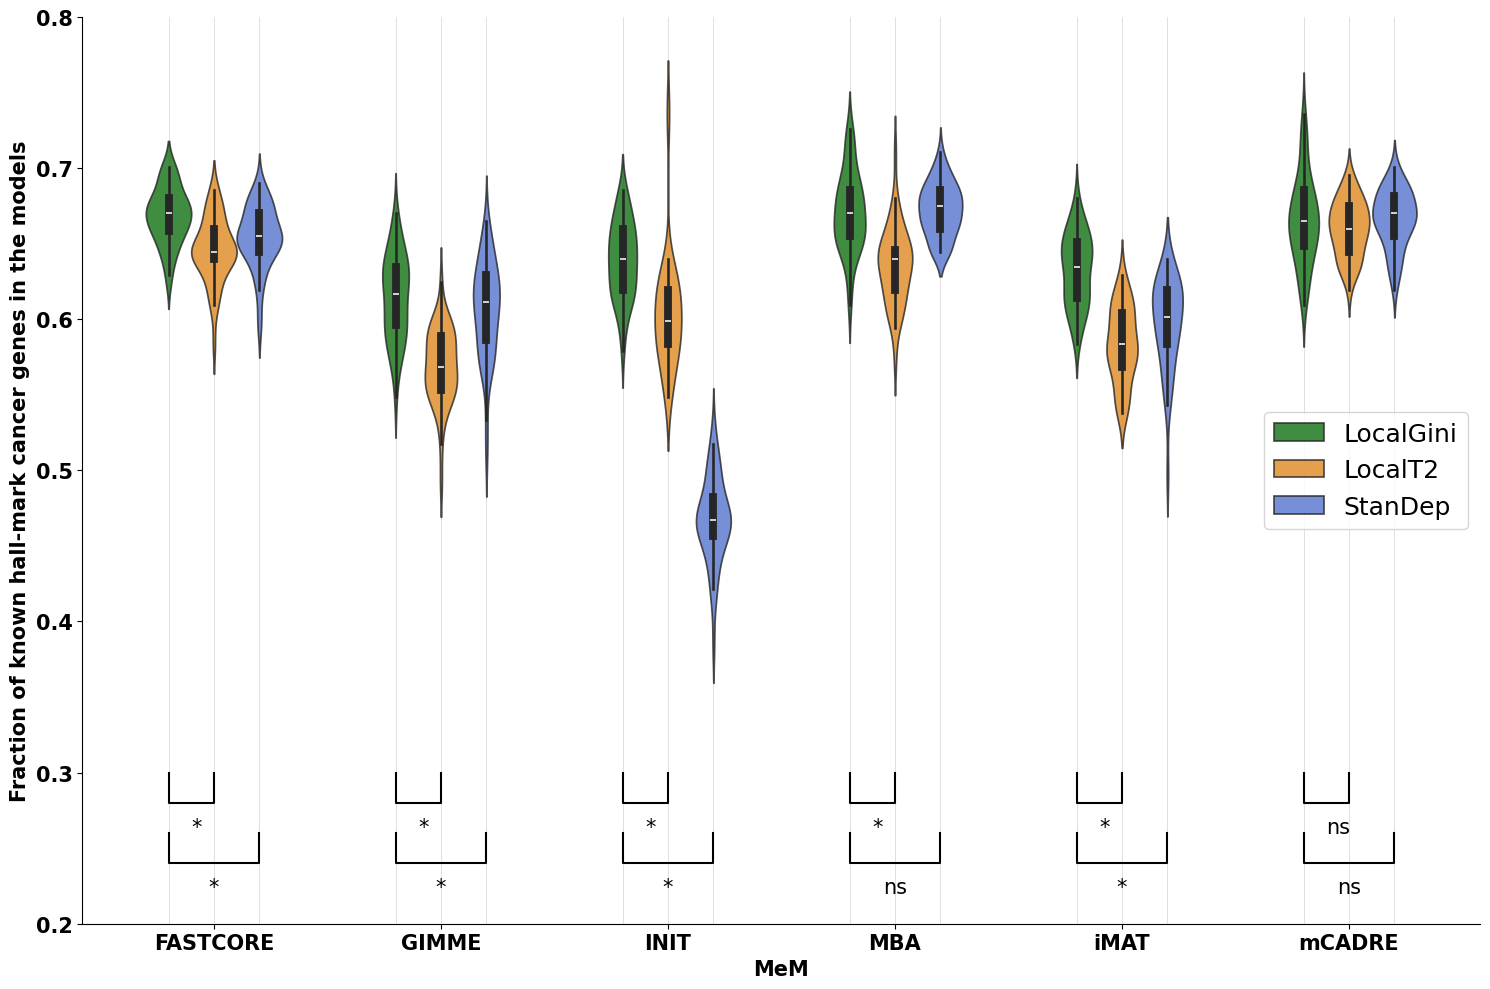

In [9]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
pal1={'LocalGiniModels':'g','LT2':'darkorange','StanDep':'royalblue'}
sns.violinplot(x="MeM", y="acc_per", hue="Ths",
                 data=df,palette=pal1,width=0.6,hue_order=['LocalGiniModels','LT2','StanDep'],alpha=0.8)
ax.set_ylim(0.2,0.8)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15,fontweight='bold')
ax.set_xlabel('MeM',fontweight='bold',fontsize=15)
ax.set_ylabel('Fraction of known hall-mark cancer genes in the models',fontweight='bold',fontsize=15)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels([round(x,1) for x in ax.get_yticks()],fontsize=15,fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
h, l = ax.get_legend_handles_labels()
rename_dict = {'LocalGiniModels':'LocalGini','LT2':'LocalT2','StanDep':'StanDep'}
l = [rename_dict[x] for x in l]
ax.legend(h, l,fontsize=18,loc='best')
dist = 0.2
for i in range(6):
    ax.plot([i,i],[0.2,0.8],lw=0.5,color='lightgray',zorder=0)
    ax.plot([i-dist,i-dist],[0.2,0.8],lw=0.5,color='lightgray',zorder=0)
    ax.plot([i+dist,i+dist],[0.2,0.8],lw=0.5,color='lightgray',zorder=0)
    ax.plot([i-dist,i-dist,i,i],[0.3,0.28,0.28,0.3],lw=1.5,color='black')
    ax.plot([i-dist,i-dist,i+dist,i+dist],[0.26,0.24,0.24,0.26],lw=1.5,color='black')
    lg_ = df[(df['Ths']=='LocalGiniModels') & (df['MeM']==mems[i])]['acc_per'].values
    lt2_ = df[(df['Ths']=='LT2') & (df['MeM']==mems[i])]['acc_per'].values
    sd_ = df[(df['Ths']=='StanDep') & (df['MeM']==mems[i])]['acc_per'].values
    p_lg_lt2 = wilcoxon(lg_,lt2_,alternative='greater')
    p_lg_sd = wilcoxon(lg_,sd_,alternative='greater')
    if p_lg_lt2.pvalue<0.01:
      ax.text(i-dist/2,0.26,'*', fontsize=15)
    else:
      ax.text(i-dist/2,0.26,'ns', fontsize=15)
    if p_lg_sd.pvalue<0.01:
      ax.text(i,0.22,'*', fontsize=15,horizontalalignment='center')
    else:
      ax.text(i,0.22,'ns', fontsize=15,horizontalalignment='center')



plt.tight_layout()
plt.savefig('hall_mark.pdf')